# Covid 19 Curve Similarity
- **Created by Andrés Segura Tinoco**
- **Created on May 12, 2020**

**Packages Installation**
``` console
conda config --set pip_interop_enabled True
pip install similaritymeasures
```

## 1. Read C19 data by country

In [1]:
# # Import libraries
import pandas as pd
import numpy as np
import math
import similaritymeasures
from collections import Counter

In [2]:
# Load visualization libraries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
# Reading data from CSV file
dataURL = "../data/daily_total_cases_by_country.csv"
raw_data = pd.read_csv(dataURL)

In [4]:
# Show first 10 rows of header dataframe
raw_data.head(10)

,country,region,1,2,3,4,5,6,7,8,...,71,72,73,74,75,76,77,78,79,80
0,USA,Americas,15,15,15.0,15.0,15.0,15.0,35.0,35.0,...,960896.0,987160.0,1010507.0,1035765.0,1064572.0,1095210.0,1131452.0,1160774.0,1188122.0,1212900.0
1,Spain,Europe,2,2,2.0,2.0,2.0,2.0,2.0,2.0,...,223759.0,226629.0,229422.0,232128.0,236899.0,239639.0,242988.0,245567.0,247122.0,248301.0
2,Italy,Europe,3,3,3.0,3.0,3.0,4.0,21.0,79.0,...,195351.0,197675.0,199414.0,201505.0,203591.0,205463.0,207428.0,209328.0,210717.0,211938.0
3,France,Europe,12,12,12.0,12.0,12.0,12.0,12.0,12.0,...,161488.0,162100.0,165842.0,165911.0,166420.0,167178.0,167346.0,168396.0,168693.0,169462.0
4,Germany,Europe,16,16,16.0,16.0,16.0,16.0,16.0,16.0,...,156513.0,157770.0,158758.0,159912.0,161539.0,163009.0,164077.0,164967.0,165664.0,166152.0
5,UK,Europe,9,9,9.0,9.0,9.0,9.0,9.0,9.0,...,148377.0,152840.0,157149.0,161145.0,165221.0,171253.0,177454.0,182260.0,186599.0,190584.0
6,Brazil,Americas,1,1,1.0,1.0,2.0,2.0,2.0,2.0,...,115953.0,126611.0,135773.0,146894.0,156061.0,162699.0,169594.0,178214.0,190137.0,192081.0
7,Iran,Asia,2,5,18.0,29.0,43.0,61.0,95.0,139.0,...,93657.0,94640.0,95646.0,96448.0,97424.0,98647.0,99970.0,101650.0,103135.0,104691.0
8,China,Asia,571,830,1287.0,1975.0,2744.0,4515.0,5974.0,7711.0,...,81589.0,81620.0,81639.0,81669.0,81708.0,81740.0,81802.0,81865.0,81865.0,81907.0
9,Peru,Americas,1,6,7.0,9.0,11.0,17.0,22.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Calculate the Similarity between Countries

In [5]:
# Control variables
cnt = Counter()
top_country = 10
n_days = 70
n_methods = 6

# Analysis variables
exp_country = 'Colombia'
exp_data = np.zeros((n_days, 2))
countries_data = dict()
countries_region = dict()

In [6]:
# Split data between expected and reality
for ix, row in raw_data.iterrows():
    country_name = row["country"]
    countries_region[country_name] = row["region"]
    y = []
    
    for i in range(1, n_days + 1):
            if pd.notna(row[str(i)]):
                y.append(int(row[str(i)]))
            else:
                break
    
    if country_name == exp_country:    
        exp_data[:, 0] = np.arange(n_days)
        exp_data[:, 1] = y
    else:
        if len(y) == n_days:
            temp_data = np.zeros((n_days, 2))
            temp_data[:, 0] = np.arange(n_days)
            temp_data[:, 1] = y
            countries_data[country_name] = temp_data

### 2.1. Mean Absolute Error

In [7]:
mae_result = dict()
for country, num_data in countries_data.items():
    mae = 0
    for ix in range(0, n_days):
        mae += abs(exp_data[ix, 1] - num_data[ix, 1])
    mae_result[country] = mae / n_days

In [8]:
# Get and save top N
output = sorted(mae_result, key=mae_result.get, reverse=False)[:top_country]
for country in output:
    cnt[country] += 1
    print('%s: %s' % (country, mae_result[country]))

South Africa: 614.2285714285714
Dominican Republic: 675.7714285714286
Indonesia: 759.9285714285714
Romania: 976.9142857142857
Serbia: 983.9428571428572
Ukraine: 1004.3857142857142
Denmark: 1005.7142857142857
Sweden: 1184.3142857142857
Qatar: 1307.4
Czechia: 1366.1714285714286


### 2.2. Partial Curve Mapping

In [9]:
# Quantify the difference between the two curves using PCM
pcm_result = dict()
for country, num_data in countries_data.items():
    pcm = similaritymeasures.pcm(exp_data, num_data)
    pcm_result[country] = pcm

In [10]:
# Get and save top N
output = sorted(pcm_result, key=pcm_result.get, reverse=False)[:top_country]
for country in output:
    cnt[country] += 1
    print('%s: %s' % (country, pcm_result[country]))

South Africa: 1.335436639704053
Indonesia: 1.610547831059696
Romania: 1.814663541988614
Ukraine: 2.5765484211615592
Serbia: 2.7190253085005933
Denmark: 2.7883424604751674
Dominican Republic: 2.9957776524840387
Singapore: 3.08395540742833
Sweden: 3.722962560412198
UAE: 4.448097018701377


### 2.3. Discrete Frechet distance

In [11]:
### Quantify the difference between the two curves using Discrete Frechet distance
df_result = dict()
for country, num_data in countries_data.items():
    df = similaritymeasures.frechet_dist(exp_data, num_data)
    df_result[country] = df

In [12]:
# Get and save top N
output = sorted(df_result, key=df_result.get, reverse=False)[:top_country]
for country in output:
    cnt[country] += 1
    print('%s: %s' % (country, df_result[country]))

Singapore: 855.0005847951217
South Africa: 856.0005841119503
Romania: 907.0
Indonesia: 1102.0
S. Korea: 2222.0002250224907
Serbia: 2556.000195618146
Austria: 2691.0
Ukraine: 2718.0
Denmark: 2992.000167112295
Israel: 3016.0


### 2.4. Area between two Curves

In [13]:
# Quantify the difference between the two curves using Area between two Curves
area_result = dict()
for country, num_data in countries_data.items():
    area = similaritymeasures.area_between_two_curves(exp_data, num_data)
    area_result[country] = area

In [14]:
# Get and save top N
output = sorted(area_result, key=area_result.get, reverse=False)[:top_country]
for country in output:
    cnt[country] += 1
    print('%s: %s' % (country, area_result[country]))

South Africa: 42568.0
Dominican Republic: 45779.0
Indonesia: 52633.5
Serbia: 67597.5
Romania: 67927.5
Denmark: 68904.0
Ukraine: 68947.0
Sweden: 80582.5
Qatar: 87882.5
Czechia: 93213.5


### 2.5. Curve Length Similarity

In [15]:
# Quantify the difference between the two curves using Curve Length based similarity measure
cl_result = dict()
for country, num_data in countries_data.items():
    cl = similaritymeasures.curve_length_measure(exp_data, num_data)
    cl_result[country] = cl

In [16]:
# Get and save top N
output = sorted(cl_result, key=cl_result.get, reverse=False)[:top_country]
for country in output:
    cnt[country] += 1
    print('%s: %s' % (country, cl_result[country]))

South Africa: 1.1591486758197114
Indonesia: 1.273408801873136
Romania: 1.3232982404007205
Serbia: 1.6769912858416156
Ukraine: 1.97307641773427
Denmark: 2.0329160905450463
Dominican Republic: 2.2869688246208137
Singapore: 2.7034810845175246
Sweden: 2.8479739809206848
Czechia: 2.901274104002833


### 2.6. Dynamic Time Warping distance

In [17]:
# Quantify the difference between the two curves using Dynamic Time Warping distance
dtw_result = dict()
for country, num_data in countries_data.items():
    dtw, d = similaritymeasures.dtw(exp_data, num_data)
    dtw_result[country] = dtw

In [18]:
# Get and save top N
output = sorted(dtw_result, key=dtw_result.get, reverse=False)[:top_country]
for country in output:
    cnt[country] += 1
    print('%s: %s' % (country, dtw_result[country]))

South Africa: 6361.679124431537
Indonesia: 6458.694091129643
Romania: 7044.939217235316
Singapore: 10548.831671672584
Ukraine: 13856.158357067947
Serbia: 14399.034684517026
Dominican Republic: 15804.978067716082
Denmark: 16930.132875574025
S. Korea: 18506.495373222024
UAE: 21225.04389314931


## 3. Plot Similarity Results

In [19]:
cnt.most_common()

[('South Africa', 6),
 ('Indonesia', 6),
 ('Romania', 6),
 ('Serbia', 6),
 ('Ukraine', 6),
 ('Denmark', 6),
 ('Dominican Republic', 5),
 ('Sweden', 4),
 ('Singapore', 4),
 ('Czechia', 3),
 ('Qatar', 2),
 ('UAE', 2),
 ('S. Korea', 2),
 ('Austria', 1),
 ('Israel', 1)]

In [20]:
# Palette of colores
palette = {"Africa": "#FF7F0E", "Americas": "#D62728", "Asia": "#2CA02C", "Europe": "#1F77B4", "Oceania": "#9467BD"}
bars = []
values= []

for row in cnt.most_common():
    bars.append(row[0])
    values.append(row[1])

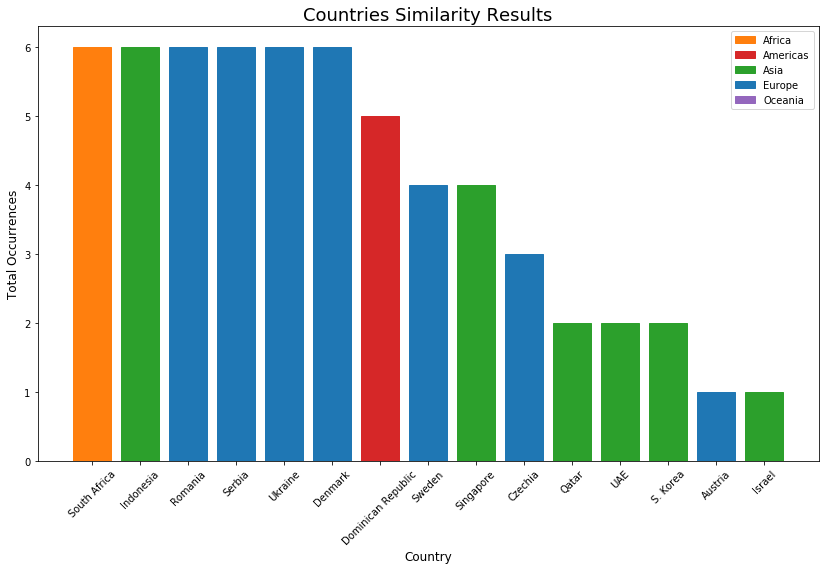

In [21]:
# Plot similarity results
plt.figure(figsize = (14, 8))

barlist = plt.bar(bars, values)
for i, v in enumerate(bars):
    barlist[i].set_color(palette[countries_region[v]])

# Add custom legend
legend_list = []
for k, v in palette.items():
    legend_list.append(mpatches.Patch(color = v, label = k))

# Plot setup
plt.xticks(rotation=45)
plt.title("Countries Similarity Results", fontsize = 18)
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Total Occurrences", fontsize = 12)
plt.legend(handles = legend_list, loc = "best")
plt.show()

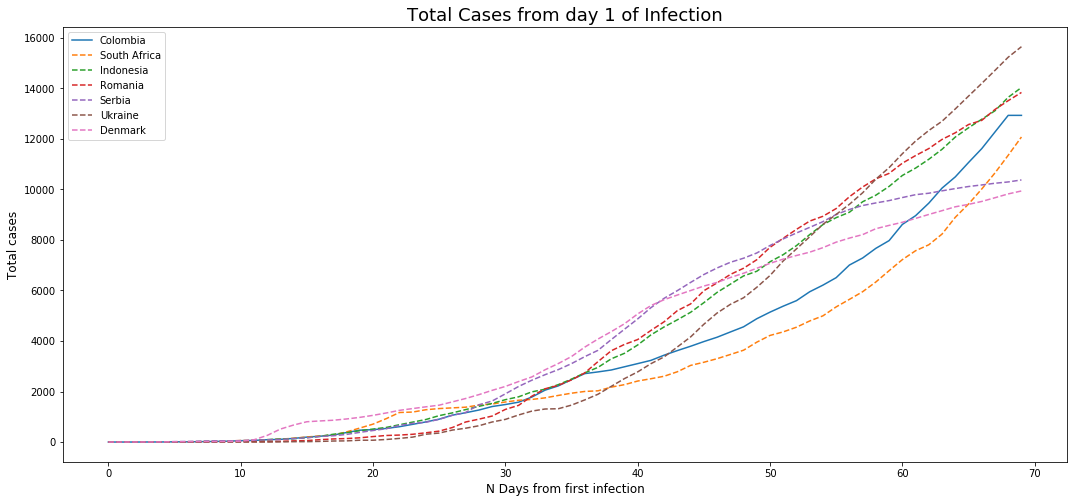

In [22]:
# Plot trends more similar to Colombia
country_list = ['Colombia']

plt.figure(figsize = (18, 8))
plt.plot(exp_data[:, 0], exp_data[:, 1])

for country in cnt:
    if cnt[country] == n_methods:
        country_list.append(country)
        num_data = countries_data[country]
        plt.plot(num_data[:, 0], num_data[:, 1], linestyle='--')

# Plot setup
plt.title("Total Cases from day 1 of Infection", fontsize = 18)
plt.xlabel("N Days from first infection", fontsize = 12)
plt.ylabel("Total cases", fontsize = 12)
plt.legend(country_list, loc = "best")
plt.show()

<hr>
<p><a href="https://github.com/ansegura7/WebScraping_Covid19">« Home</a></p>